In [20]:
import bilby
import os
import glob
import numpy as np
from scipy import interpolate
import utilizes_plot
import corner.corner
#import scienceplots
import pandas as pd
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = ['serif']
mpl.rcParams['font.serif'] = ['Times New Roman']
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])

In [9]:


dns_table=pd.read_excel('/home/yzq/swp_win10/flux_mass_data/DNS_mass.xlsx')
ns_x_table1=pd.read_excel('/home/yzq/swp_win10/flux_mass_data/NSmass_mr_ms.xlsx',sheet_name='Sheet1')
ns_x_table2=pd.read_excel('/home/yzq/swp_win10/flux_mass_data/NSmass_mr_ms.xlsx',sheet_name='Sheet2')

dns_tem=list()
for i in range(len(dns_table['s1400'])):
    m_l=np.zeros(4)
    if dns_table['s1400'][i] != 0:
        a_temp= ( np.random.normal( dns_table['dl'][i], dns_table['dl'][i]*0.2, 10000 ) )**2*np.random.normal( dns_table['s1400'][i], dns_table['es'][i], 10000 ) 
        m_l[0]=dns_table['mr'][i]
        m_l[1]=dns_table['mrerr'][i]
        m_l[2]=np.mean(a_temp)
        m_l[3]=np.std(a_temp)
        dns_tem.append(m_l)

ns_x_tem1=list()
for i in range(len(ns_x_table1['s1400'])):
    m_l=np.zeros(4)
    if ns_x_table1['s1400'][i] != 0:
        b_temp= ( np.random.normal( ns_x_table1['dl'][i], ns_x_table1['dl'][i]*0.2, 10000 ) )**2*np.random.normal( ns_x_table1['s1400'][i], ns_x_table1['es'][i], 10000 ) 
        m_l[0]=ns_x_table1['mNS'][i]
        m_l[1]=ns_x_table1['mNSerror'][i]
        m_l[2]=np.mean(b_temp)
        m_l[3]=np.std(b_temp)
        ns_x_tem1.append(m_l)
ns_x_tem2=list()
for i in range(len(ns_x_table2['s1400'])):
    m_l=np.zeros(4)
    if ns_x_table2['s1400'][i] != 0:
        c_temp= ( np.random.normal( ns_x_table2['dl'][i], ns_x_table2['dl'][i]*0.2, 10000 ) )**2*np.random.normal( ns_x_table2['s1400'][i], ns_x_table2['es'][i], 10000 ) 
        m_l[0]=ns_x_table2['mNS'][i]
        m_l[1]=ns_x_table2['mNSerror'][i]
        m_l[2]=np.mean(c_temp)
        m_l[3]=np.std(c_temp)
        ns_x_tem2.append(m_l)
m_l_tem=dns_tem + ns_x_tem1 + ns_x_tem2





In [53]:
import astropy
from astropy import units as ut

(ut.mJy*ut.kpc*ut.kpc).to(ut.erg/ut.s/ut.Hz)



9.521406136918413e+16

In [54]:
convert_c=9.521406136918413e+16 * 4*np.pi *1400*10**6

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


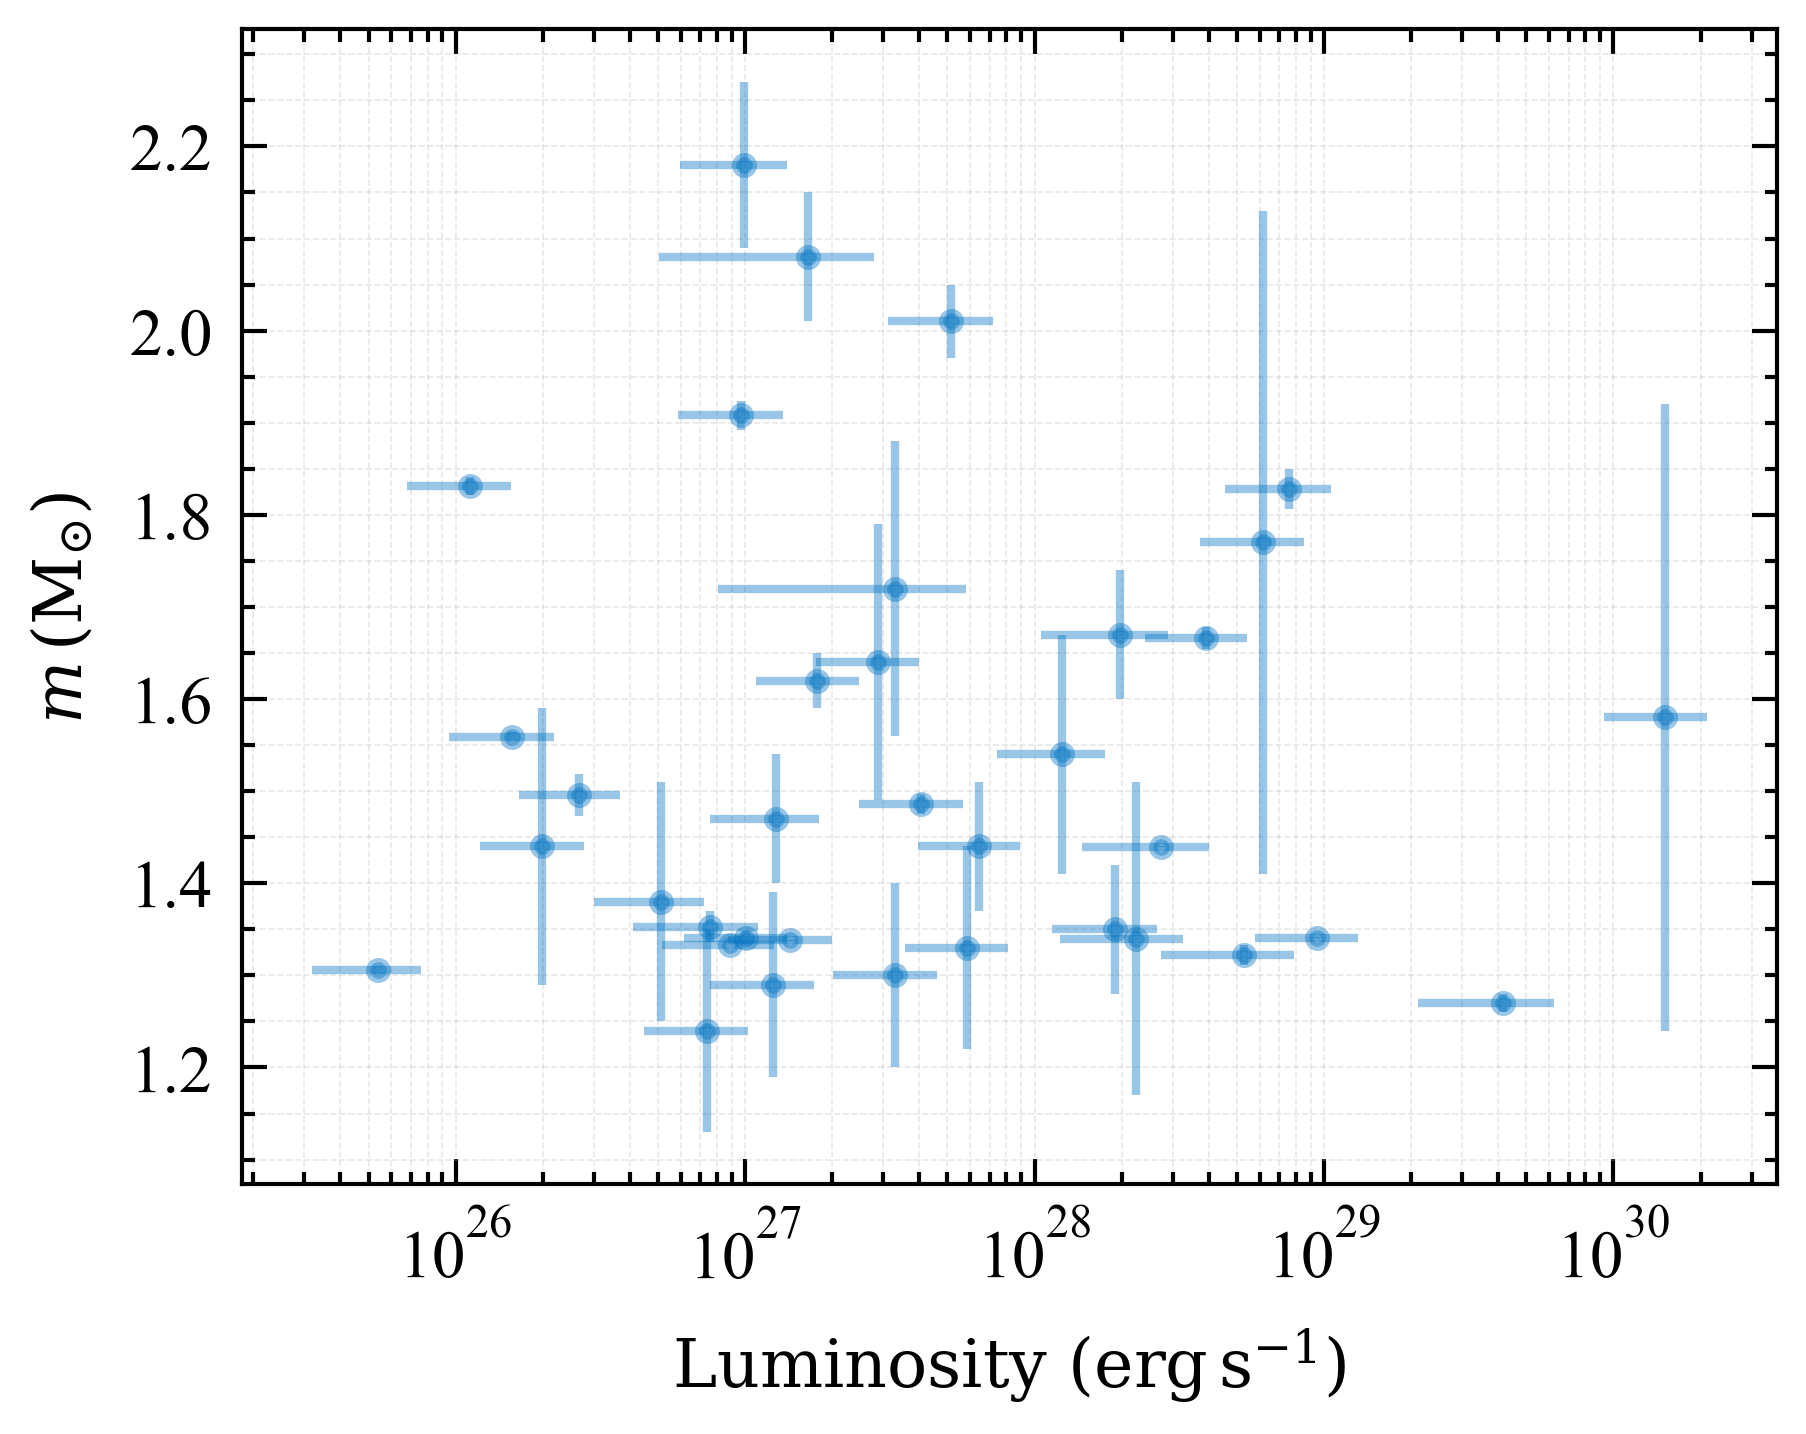

In [68]:
yval = np.array(m_l_tem)[:,0]
xval = np.array(m_l_tem)[:,2] * convert_c 
yerr1 = np.array(m_l_tem)[:,1]
xerr1 = np.array(m_l_tem)[:,3] * convert_c
plt.grid( which='both',linestyle='--',lw=0.2,alpha=0.3)

plt.errorbar(xval, yval, xerr= xerr1, yerr=yerr1, marker="o", ms=2,color='#0072c1',alpha=0.4,linestyle="none")


plt.xscale('log')

plt.xlabel(r'$\rm Luminosity\,\,(erg\,s^{-1})$')
plt.ylabel(r'$m\,(\rm{M_{\odot}})$')
plt.legend(frameon=0,loc='upper left',fontsize=6)
plt.savefig('m_lum.jpg')
plt.show()

In [62]:
((ut.erg/ut.s)/(1.4*ut.GHz)).to(ut.mJy*ut.kpc*ut.kpc)

<Quantity 7.50189314e-27 kpc2 mJy>

In [70]:
1.1e26*7.5018931*10**(-27)

0.8252082410000001

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


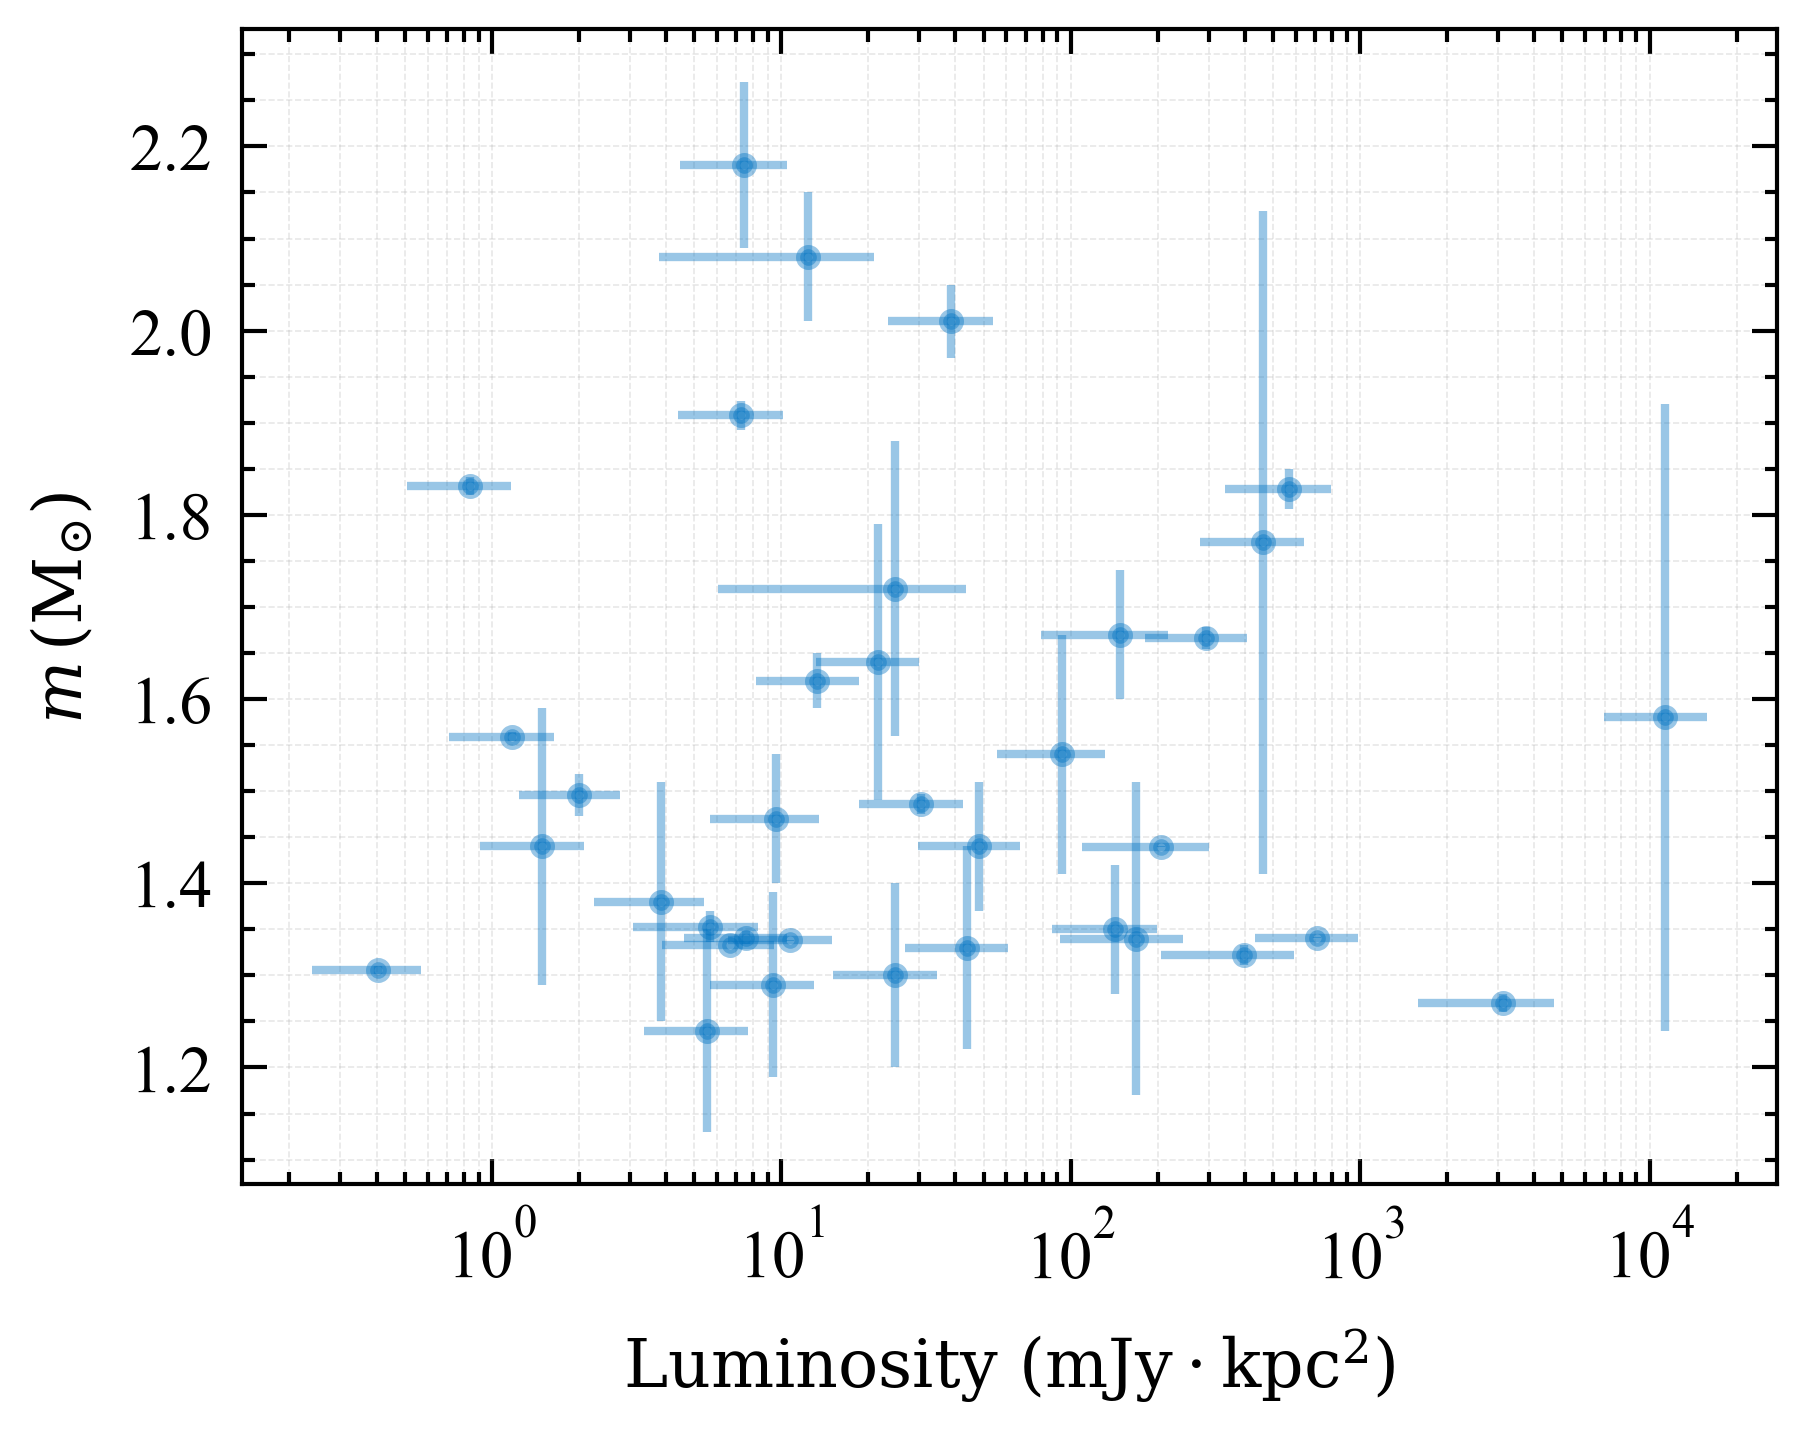

In [58]:
yval = np.array(m_l_tem)[:,0]
xval = np.array(m_l_tem)[:,2]  *4*np.pi
yerr1 = np.array(m_l_tem)[:,1]
xerr1 = np.array(m_l_tem)[:,3]  *4*np.pi
plt.grid( which='both',linestyle='--',lw=0.2,alpha=0.3)

plt.errorbar(xval, yval, xerr= xerr1, yerr=yerr1, marker="o", ms=2,color='#0072c1',alpha=0.4,linestyle="none")

#plt.scatter(xval[2],yval[2],s=5,marker='o',c='r',label=r'$\rm J0737-3039A$')
#plt.scatter(xval[5],yval[5],s=5,marker='o',c='green',label=r'$\rm B1913+16$')
#plt.scatter(xval[25],yval[25],s=5,marker='o',c='yellow',label=r'$\rm B2222-0137$')
plt.xscale('log')

plt.xlabel(r'$\rm Luminosity\,\,(mJy\cdot kpc^2)$')
plt.ylabel(r'$m\,(\rm{M_{\odot}})$')
plt.legend(frameon=0,loc='upper left',fontsize=6)
plt.savefig('m_lum_mjy.jpg')
plt.show()

In [31]:
m_l_tem

[array([1.306     , 0.004     , 0.03216803, 0.01315959]),
 array([1.33300000e+00, 2.00000000e-04, 5.28872863e-01, 2.20134594e-01]),
 array([1.33810000e+00, 7.00000000e-04, 8.54782014e-01, 3.33123967e-01]),
 array([1.34060000e+00, 5.00000000e-04, 5.64950403e+01, 2.18894186e+01]),
 array([1.341     , 0.007     , 0.60102969, 0.23490417]),
 array([1.43980000e+00, 2.00000000e-04, 1.63022473e+01, 7.58128772e+00]),
 array([1.559     , 0.005     , 0.09380875, 0.03697518]),
 array([1.62      , 0.03      , 1.06145412, 0.41028537]),
 array([1.32200000e+00, 1.10000000e-02, 3.16197682e+01, 1.53535343e+01]),
 array([1.24      , 0.11      , 0.43996284, 0.17196461]),
 array([1.29      , 0.1       , 0.7435099 , 0.29232658]),
 array([1.33      , 0.11      , 3.48990289, 1.35850528]),
 array([ 1.34      ,  0.17      , 13.36400299,  6.06153172]),
 array([ 1.35      ,  0.07      , 11.35588852,  4.51834427]),
 array([1.353     , 0.017     , 0.45187663, 0.20738957]),
 array([1.38      , 0.13      , 0.30501889

In [71]:
(4517.9-800)*0.8 + 800 + 4000*0.8

6974.32

In [72]:
4517 *0.8 + 800+ 3200*0.8

6973.6